信誉评级A的多项式拟合系数: [  -1.12148361   37.96951968 -258.57045064  640.94442346]
信誉评级B的多项式拟合系数: [  -1.01650316   33.99469813 -225.05053717  552.82914922]
信誉评级C的多项式拟合系数: [  -0.97349707   32.15686443 -207.38587904  504.71699064]


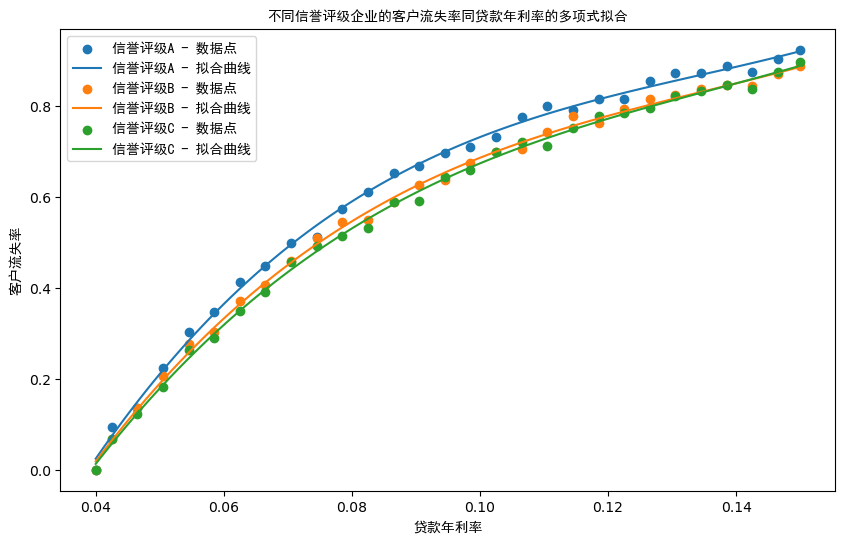

信誉评级A的R^2: 0.9977471142229192
信誉评级B的R^2: 0.9982405624066651
信誉评级C的R^2: 0.9981641690191793


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import r2_score
import matplotlib.font_manager as fm

# 设置中文字体
font_path = 'C:/Windows/Fonts/simhei.ttf'  # 这里使用的是黑体字，你可以根据需要更换字体
my_font = fm.FontProperties(fname=font_path)

# 读取数据
file_path = './Data&Question/File3.xlsx'
data = pd.read_excel(file_path)

# 提取数据
interest_rates = data.iloc[1:, 0].astype(float).values
churn_rate_A = data.iloc[1:, 1].astype(float).values
churn_rate_B = data.iloc[1:, 2].astype(float).values
churn_rate_C = data.iloc[1:, 3].astype(float).values

# 多项式拟合
degree = 3  # 可以根据需要调整多项式的阶数
poly_A = Polynomial.fit(interest_rates, churn_rate_A, degree)
poly_B = Polynomial.fit(interest_rates, churn_rate_B, degree)
poly_C = Polynomial.fit(interest_rates, churn_rate_C, degree)

# 打印拟合结果
print(f"信誉评级A的多项式拟合系数: {poly_A.convert().coef}")
print(f"信誉评级B的多项式拟合系数: {poly_B.convert().coef}")
print(f"信誉评级C的多项式拟合系数: {poly_C.convert().coef}")

# 绘制拟合曲线
x_fit = np.linspace(min(interest_rates), max(interest_rates), 100)
y_fit_A = poly_A(x_fit)
y_fit_B = poly_B(x_fit)
y_fit_C = poly_C(x_fit)

plt.figure(figsize=(10, 6))
plt.scatter(interest_rates, churn_rate_A, label='信誉评级A - 数据点')
plt.plot(x_fit, y_fit_A, label='信誉评级A - 拟合曲线')
plt.scatter(interest_rates, churn_rate_B, label='信誉评级B - 数据点')
plt.plot(x_fit, y_fit_B, label='信誉评级B - 拟合曲线')
plt.scatter(interest_rates, churn_rate_C, label='信誉评级C - 数据点')
plt.plot(x_fit, y_fit_C, label='信誉评级C - 拟合曲线')
plt.xlabel('贷款年利率', fontproperties=my_font)
plt.ylabel('客户流失率', fontproperties=my_font)
plt.legend(prop=my_font)
plt.title('不同信誉评级企业的客户流失率同贷款年利率的多项式拟合', fontproperties=my_font)
plt.show()

# 计算R^2
r2_A = r2_score(churn_rate_A, poly_A(interest_rates))
r2_B = r2_score(churn_rate_B, poly_B(interest_rates))
r2_C = r2_score(churn_rate_C, poly_C(interest_rates))

# 打印R^2结果
print(f"信誉评级A的R^2: {r2_A}")
print(f"信誉评级B的R^2: {r2_B}")
print(f"信誉评级C的R^2: {r2_C}")
